# `Predicting Old Car Price (Improved)`

In [355]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Importing the Dataset

In [356]:
df = pd.read_csv("./car_price.csv")

In [357]:
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


### Dropping unnamed column

In [358]:
df = df.drop(df.columns[0], axis=1)

In [359]:
df.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             5512 non-null   object
 1   car_prices_in_rupee  5512 non-null   object
 2   kms_driven           5512 non-null   object
 3   fuel_type            5512 non-null   object
 4   transmission         5512 non-null   object
 5   ownership            5512 non-null   object
 6   manufacture          5512 non-null   int64 
 7   engine               5512 non-null   object
 8   Seats                5512 non-null   object
dtypes: int64(1), object(8)
memory usage: 387.7+ KB


## Column Description
- car_name: **nominal** category;
- car_prices_in_rupee: **continuous numeric**;
- kms_driven: **continuous numeric**;
- fuel_type: **nominal** category;
- transmission: **nominal** category;
- ownership:  **ordinal** category;
- manufacture: **ordinal** category;
- engine: **discrete numeric**;
- seats: **discrete numeric**;

### Nominal Category:
#### A group of objects or ideas that can be collectively grouped on the basis of a particular characteristic.

### Ordinal Category:
#### a number that shows the order or position of something in a series

### Check Duplicity

In [361]:
df.duplicated().sum()
df[df.duplicated()]

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
1151,Audi Q5 3.0 TDI Quattro,9.95 Lakh,"68,000 kms",Diesel,Automatic,3rd Owner,2011,2967 cc,5 Seats
1297,Mercedes-Benz GLS 350d Grand Edition,59.50 Lakh,"45,000 kms",Diesel,Automatic,2nd Owner,2016,2499 cc,5 Seats
1351,Honda Jazz 1.2 V AT i VTEC,6.90 Lakh,"27,200 kms",Petrol,Automatic,1st Owner,2017,1462 cc,5 Seats
1352,Mahindra Thar CRDe,7.72 Lakh,"46,365 kms",Diesel,Manual,1st Owner,2017,1461 cc,5 Seats
1353,Maruti Ciaz Alpha BSIV,8.72 Lakh,"82,496 kms",Petrol,Manual,1st Owner,2019,1248 cc,5 Seats
...,...,...,...,...,...,...,...,...,...
5301,Mercedes-Benz E-Class E250 CDI Avantgarde,25.90 Lakh,"60,625 kms",Diesel,Automatic,2nd Owner,2016,1197 cc,5 Seats
5318,Mercedes-Benz E-Class Exclusive E 220d,76.25 Lakh,"2,000 kms",Diesel,Automatic,1st Owner,2022,1950 cc,5 Seats
5322,BMW X3 xDrive 20d Luxury Line,60 Lakh,"19,000 kms",Diesel,Automatic,1st Owner,2021,1997 cc,5 Seats
5338,Volvo S90 D4 Inscription BSIV,44.75 Lakh,"20,000 kms",Diesel,Automatic,1st Owner,2018,1950 cc,5 Seats


## 2) Data Preprocessing

### Remove duplicates

In [362]:
df = df.drop_duplicates().reset_index(drop=True)

### Remove lakh in car_prices_in_rupee and convert to float

In [363]:
df[["price", "multiply"]] = df["car_prices_in_rupee"].str.split(" ", 1, expand=True)
df["price"] = df["price"].str.replace(",","").astype(float)
df.drop("car_prices_in_rupee", axis=1, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4488\263091762.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[["price", "multiply"]] = df["car_prices_in_rupee"].str.split(" ", 1, expand=True)


In [364]:
df.head()

,car_name,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,price,multiply
0,Jeep Compass 2.0 Longitude Option BSIV,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,10.03,Lakh
1,Renault Duster RXZ Turbo CVT,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,12.83,Lakh
2,Toyota Camry 2.5 G,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats,16.40,Lakh
3,Honda Jazz VX CVT,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats,7.77,Lakh
4,Volkswagen Polo 1.2 MPI Highline,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats,5.15,Lakh


### Remove km in kms_driven and convert to int

In [365]:
df["kms_driven"] = df["kms_driven"].str.replace(" kms", "")
df["kms_driven"] = df["kms_driven"].str.replace(",", "").astype(int)

### Convert manufacture to int

In [366]:
df["manufacture"] = df["manufacture"].astype(int)

### Remove cc in engine and convert to int

In [367]:
df["engine"] = df["engine"].str.replace(" cc", "").astype(int)

### Remove Seats and convert to int

In [368]:
df["Seats"] = df["Seats"].str.replace(" Seats", "").astype(int)

In [369]:
df.sample(5)

,car_name,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,price,multiply
3137,Toyota Platinum Etios 1.4 GD,78172,Diesel,Manual,1st Owner,2019,1462,5,5.65,Lakh
3624,Maruti Swift Dzire VXi,80000,Petrol,Manual,4th Owner,2009,796,5,1.75,Lakh
5081,Honda City 1.5 V MT,167457,Petrol,Manual,2nd Owner,2010,1248,5,3.05,Lakh
2876,Mahindra Quanto C2,93021,Diesel,Manual,3rd Owner,2013,1998,5,1.97,Lakh
3181,Ford Fiesta Petrol Titanium,56292,Petrol,Manual,1st Owner,2011,2393,5,2.78,Lakh


In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5436 entries, 0 to 5435
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_name      5436 non-null   object 
 1   kms_driven    5436 non-null   int32  
 2   fuel_type     5436 non-null   object 
 3   transmission  5436 non-null   object 
 4   ownership     5436 non-null   object 
 5   manufacture   5436 non-null   int32  
 6   engine        5436 non-null   int32  
 7   Seats         5436 non-null   int32  
 8   price         5436 non-null   float64
 9   multiply      5436 non-null   object 
dtypes: float64(1), int32(4), object(5)
memory usage: 339.9+ KB


In [371]:
df.describe()

,kms_driven,manufacture,engine,Seats,price
count,5436.000000,5436.000000,5436.000000,5436.000000,5436.000000
mean,63343.080390,2015.437822,1532.926784,5.252208,1724.525907
std,41961.414723,3.938207,580.933381,0.722515,11549.514953
min,250.000000,1995.000000,0.000000,2.000000,1.000000
25%,33234.000000,2013.000000,1197.000000,5.000000,3.240000
50%,59290.000000,2016.000000,1396.000000,5.000000,5.600000
75%,84363.000000,2018.000000,1950.000000,5.000000,10.750000
max,560000.000000,2022.000000,5950.000000,8.000000,99999.000000


### Removing 0 cc engine

In [372]:
df = df[~df.isin(df.loc[df['engine']==df['engine'].min()])].reset_index(drop=True)

## 3) EDA

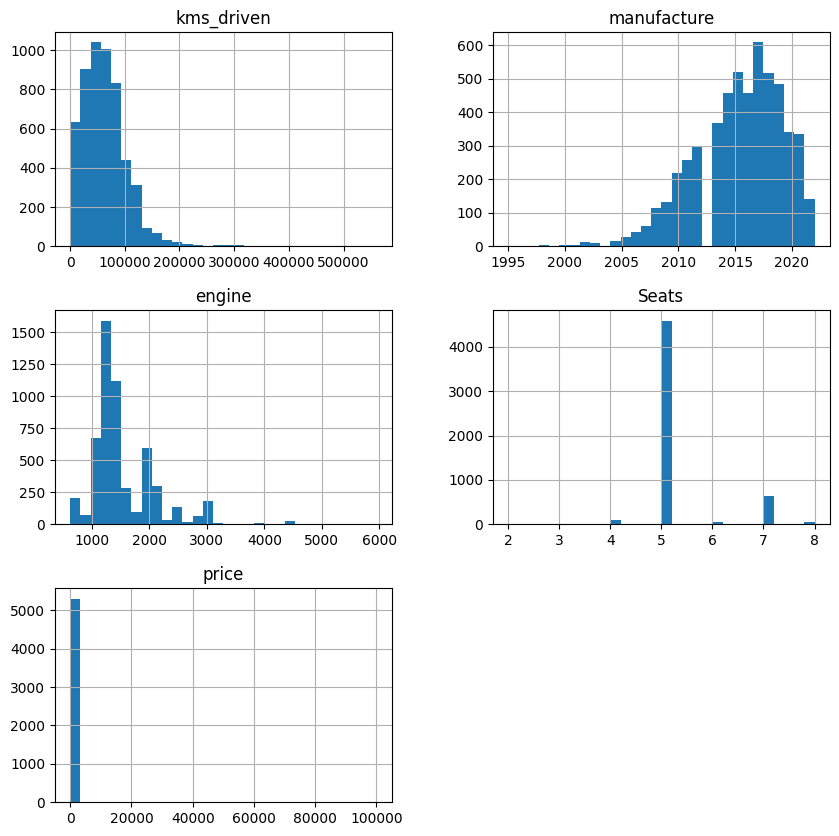

In [373]:
df.hist(figsize=(10,10), bins=30)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4488\2007294469.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="magma", annot=True)


<AxesSubplot: >

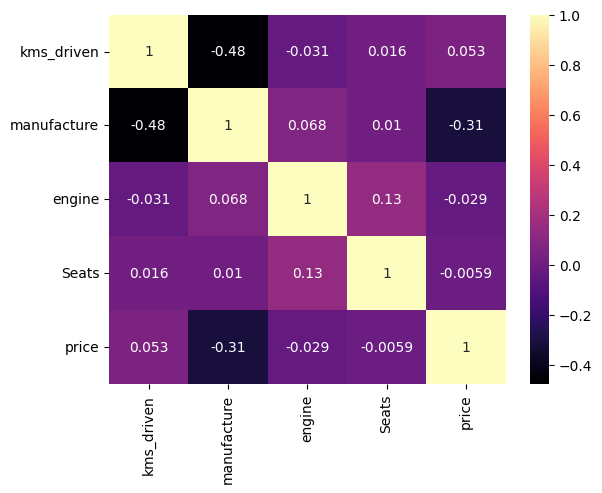

In [374]:
sns.heatmap(df.corr(), cmap="magma", annot=True)

### Plotting Correlations

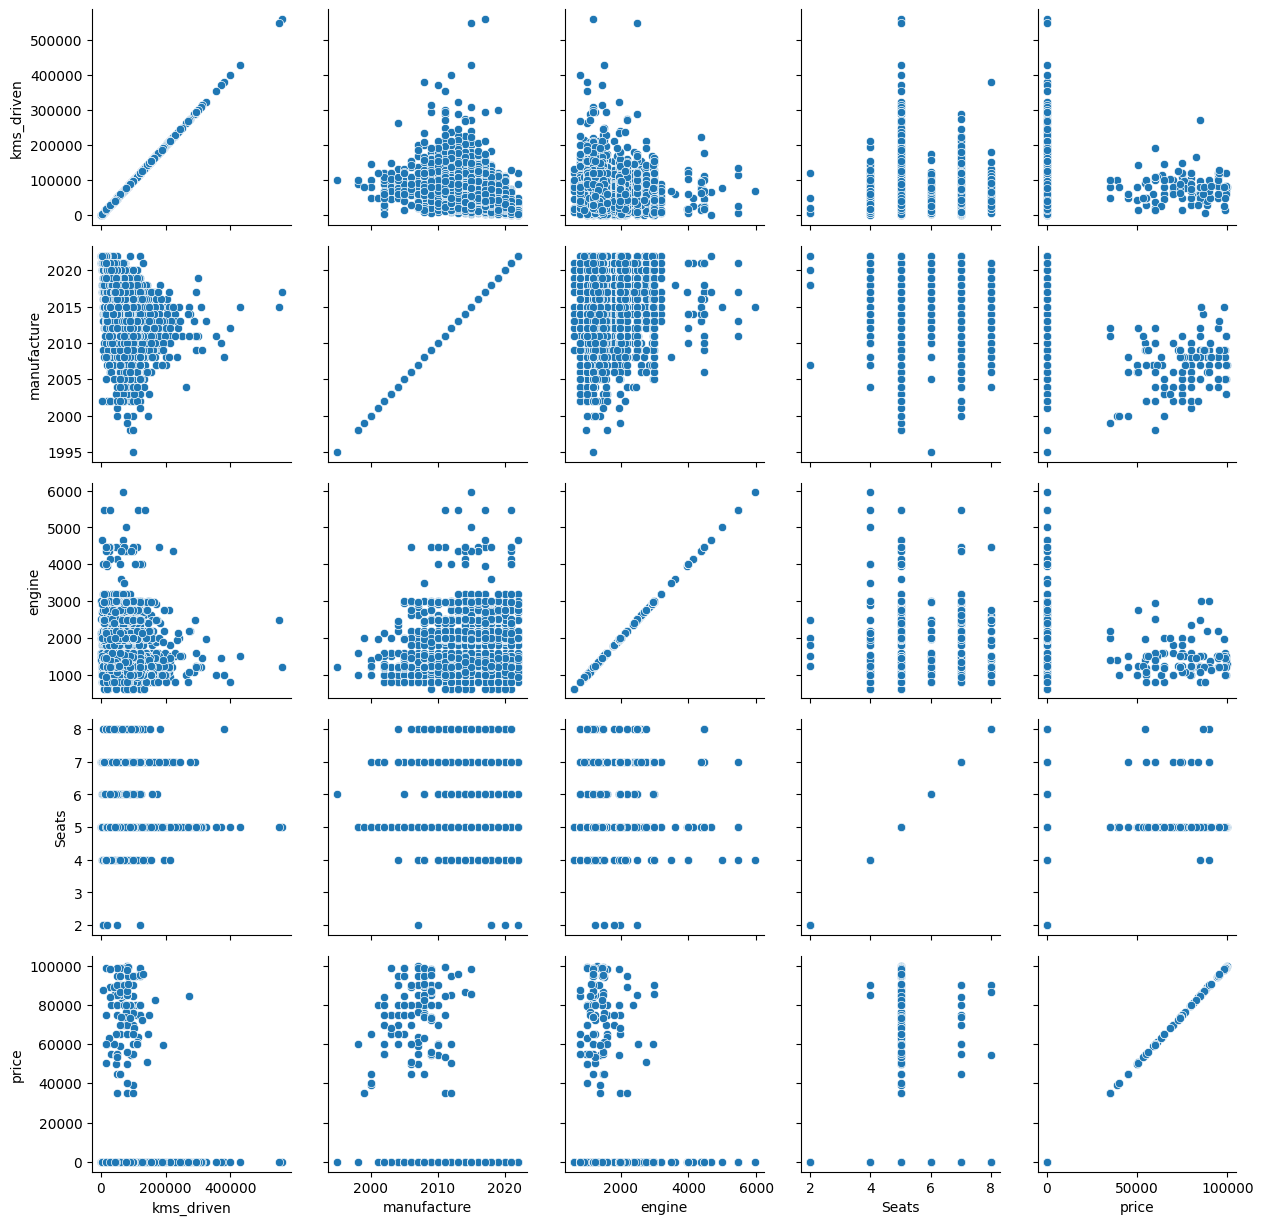

In [375]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)

### Categorical Columns

In [376]:
df.dtypes[df.dtypes == "object"]

car_name        object
fuel_type       object
transmission    object
ownership       object
multiply        object
dtype: object

In [377]:
df[df.dtypes[df.dtypes == 'object'].index.values].describe()

,car_name,fuel_type,transmission,ownership,multiply
count,5424,5424,5424,5424,5424
unique,1893,5,2,6,3
top,Maruti Alto 800 LXI,Petrol,Manual,1st Owner,Lakh
freq,53,2928,3913,3666,5246


### Only keep Lakh in car_prices_in_rupee 

In [378]:
df = df[df["multiply"] == "Lakh"].reset_index(drop=True)

### Converting Car Name to Brands only

In [379]:
df["car_name"] = df["car_name"].str.split().str[0]

In [380]:
df[df.dtypes[df.dtypes == 'object'].index.values].describe()

,car_name,fuel_type,transmission,ownership,multiply
count,5246,5246,5246,5246,5246
unique,32,5,2,6,1
top,Maruti,Petrol,Manual,1st Owner,Lakh
freq,1307,2794,3791,3580,5246


<AxesSubplot: xlabel='car_name'>

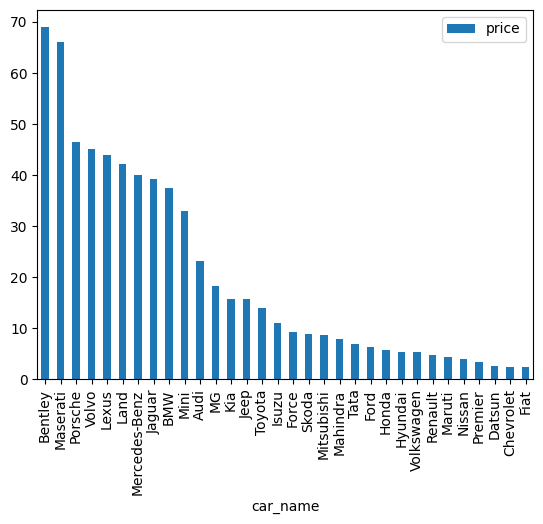

In [381]:
df.groupby("car_name").agg({"price":"mean"}).sort_values(by="price", ascending=False).plot.bar()

<AxesSubplot: xlabel='transmission'>

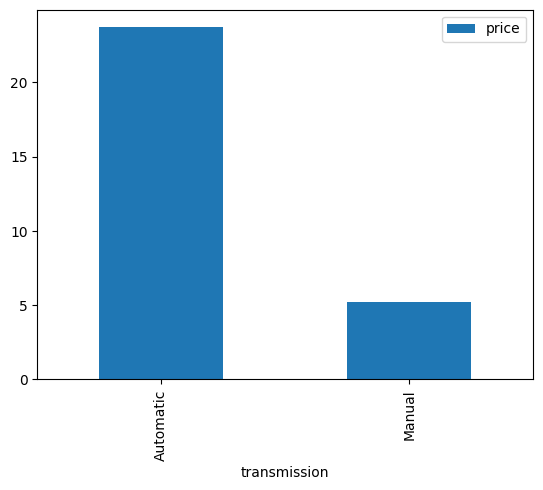

In [382]:
df.groupby("transmission").agg({"price":"mean"}).sort_values(by="price", ascending=False).plot.bar()

### Converting engine to categorical

In [383]:
df["engine_cat"] = pd.cut(df["engine"], bins=[600, 1200, 2000, np.inf], labels=["low", "medium", "high"])

<AxesSubplot: xlabel='engine_cat'>

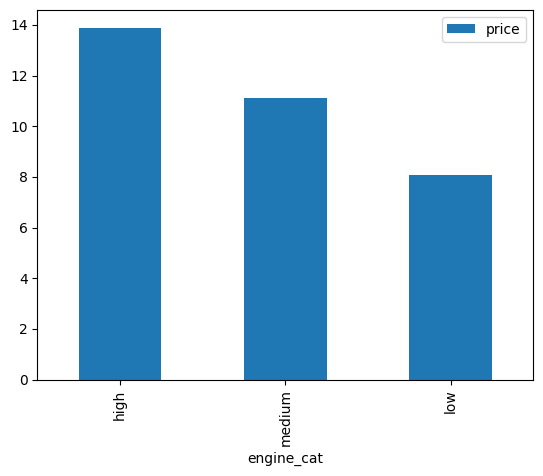

In [384]:
df.groupby("engine_cat").agg({"price":"mean"}).sort_values(by="price", ascending=False).plot.bar()

## Defining Variables for Model Training

In [385]:
df.head()

,car_name,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,price,multiply,engine_cat
0,Jeep,86226.0,Diesel,Manual,1st Owner,2017.0,1956.0,5.0,10.03,Lakh,medium
1,Renault,13248.0,Petrol,Automatic,1st Owner,2021.0,1330.0,5.0,12.83,Lakh,medium
2,Toyota,60343.0,Petrol,Automatic,1st Owner,2016.0,2494.0,5.0,16.40,Lakh,high
3,Honda,26696.0,Petrol,Automatic,1st Owner,2018.0,1199.0,5.0,7.77,Lakh,low
4,Volkswagen,69414.0,Petrol,Manual,1st Owner,2016.0,1199.0,5.0,5.15,Lakh,low


In [386]:
selected_columns = ["car_name", "kms_driven", "fuel_type",
                    "transmission", "ownership",
                    "engine_cat", "Seats", "price"]
df_model = df[selected_columns]
df_model.head()

,car_name,kms_driven,fuel_type,transmission,ownership,engine_cat,Seats,price
0,Jeep,86226.0,Diesel,Manual,1st Owner,medium,5.0,10.03
1,Renault,13248.0,Petrol,Automatic,1st Owner,medium,5.0,12.83
2,Toyota,60343.0,Petrol,Automatic,1st Owner,high,5.0,16.40
3,Honda,26696.0,Petrol,Automatic,1st Owner,low,5.0,7.77
4,Volkswagen,69414.0,Petrol,Manual,1st Owner,low,5.0,5.15


### Scaling kms_driven

In [387]:
from sklearn.preprocessing import MinMaxScaler
df_model["kms_driven"] = MinMaxScaler().fit_transform(
    df_model["kms_driven"].values.reshape(len(df_model), 1))

C:\Users\Admin\AppData\Local\Temp\ipykernel_4488\1713857819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["kms_driven"] = MinMaxScaler().fit_transform(


### Label Encoding

In [388]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_model["car_name"] = le.fit_transform(df_model["car_name"])
df_model["fuel_type"] = le.fit_transform(df_model["fuel_type"])
df_model["transmission"] = le.fit_transform(df_model["transmission"])
df_model["ownership"] = le.fit_transform(df_model["ownership"])
df_model["engine_cat"] = le.fit_transform(df_model["engine_cat"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_4488\1426351476.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["car_name"] = le.fit_transform(df_model["car_name"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_4488\1426351476.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["fuel_type"] = le.fit_transform(df_model["fuel_type"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_4488\1426351476.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [389]:
df_model.head()

,car_name,kms_driven,fuel_type,transmission,ownership,engine_cat,Seats,price
0,12,0.153597,1,1,1,2,5.0,10.03
1,26,0.023221,4,0,1,2,5.0,12.83
2,29,0.107357,4,0,1,0,5.0,16.40
3,8,0.047246,4,0,1,1,5.0,7.77
4,30,0.123562,4,1,1,1,5.0,5.15


## 4) Building the Model

### Splitting into X and y

In [390]:
X = df_model.drop("price", axis=1)
y = df_model["price"]

### Splitting into Train and Test

In [391]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

### Linear Regression

In [392]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

### Training the Model

In [393]:
model.fit(X_train, y_train)

LinearRegression()

## 5) Model Evaluation

In [394]:
model_score_train = model.score(X_train, y_train)
model_score_train

0.4504917386397418

In [395]:
model_score_test = model.score(X_test, y_test)
model_score_test

0.45226886538538247

In [396]:
predictions = model.predict(X_test)

In [397]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, predictions)
mse

106.41450447888147

In [398]:
rmse = np.sqrt(mse)
rmse

10.315740617080358